# Crimes Committed Against Women in India
This data is collated from https://data.gov.in. It has state-wise and district level data on the various crimes committed against women between 2001 to 2014. Some crimes that are included are Rape, Kidnapping and Abduction, Dowry Deaths etc.This dateset has been Downloaded form Kaggle Data set.The libreris used in this Data Analysis is Numpy,Panda,metplotlib,and seaborn. These libraries are covered in the course by Jovian.ml named as [Data Analysis with Python: Zero to Pandas](zerotopandas.com)

## Downloading the Dataset
the dataset has been downloaded form the kaggel dataset manually and upload it via Jupyter's GUI

In [6]:
import pandas as pd

In [7]:
dataset_df = pd.read_csv('crimes_against_women_2001-2014.csv')

In [8]:
dataset_df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [9]:
dataset_df.shape

(10677, 11)

There are 10678 Row in this data set.It has state-wise and district level data on the various crimes committed against women between 2001 to 2014.so number of rows should be (number of district *number of year)

In [17]:
718*14

10052

But this dataset shows 10677 row.

In [18]:
!pip install jovian --upgrade -q

In [19]:
import jovian

In [20]:
jovian.commit

<function jovian.utils.commit.commit(message=None, files=[], outputs=[], environment=None, privacy='auto', filename=None, project=None, new_project=None, git_commit=False, git_message='auto', **kwargs)>

## Data Preparation and Cleaning

Since number of row are greater than the number of district * number of Years.There is need to check for the extra coloum present here.

In [21]:
dataset_df.DISTRICT

0                 ADILABAD
1                ANANTAPUR
2                 CHITTOOR
3                 CUDDAPAH
4            EAST GODAVARI
               ...        
10672          Lakshadweep
10673    Total District(s)
10674             Karaikal
10675           Puducherry
10676    Total District(s)
Name: DISTRICT, Length: 10677, dtype: object

To start with the very basic of data cleaning, let's find out if any of the columns have any Null or missing values

In [22]:
overall_crime = dataset_df.isna().sum()

In [23]:
overall_crime

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

There is no Nan Value in the dataset

lets find the total number of district in the data set

In [24]:
districts = len(dataset_df.DISTRICT.unique())

In [25]:
districts

1605

But there are 718 districts in India, in total, which means there is messy or false datas in a huge amount, in this case, we better drop the column "District" and also "Unnamed: 0", as it is of no use, in our data analysis process.

In [26]:
dataset_df.drop(['DISTRICT', 'Unnamed: 0'], axis = 1)


,STATE/UT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,2014,1,0,0,1,2,0,0
10674,Puducherry,2014,3,1,0,12,1,1,0
10675,Puducherry,2014,7,6,1,20,7,3,0


lets analysis data of 'STATE/UT' column

In [27]:

(dataset_df['STATE/UT'].unique())

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [28]:
len(dataset_df['STATE/UT'].unique())

72

According to above dataset ,total number of state /UT are not correct. because of upper and lower case. so lets convert all state/ut data in lower case.

In [29]:
dataset_df['STATE/UT'] = dataset_df['STATE/UT'].str.lower()

print (dataset_df)

       Unnamed: 0        STATE/UT           DISTRICT  Year  Rape  \
0               0  andhra pradesh           ADILABAD  2001    50   
1               1  andhra pradesh          ANANTAPUR  2001    23   
2               2  andhra pradesh           CHITTOOR  2001    27   
3               3  andhra pradesh           CUDDAPAH  2001    20   
4               4  andhra pradesh      EAST GODAVARI  2001    23   
...           ...             ...                ...   ...   ...   
10672         832     lakshadweep        Lakshadweep  2014     1   
10673         833     lakshadweep  Total District(s)  2014     1   
10674         834      puducherry           Karaikal  2014     3   
10675         835      puducherry         Puducherry  2014     7   
10676         836      puducherry  Total District(s)  2014    10   

       Kidnapping and Abduction  Dowry Deaths  \
0                            30            16   
1                            30             7   
2                            34     

In [30]:
len(dataset_df['STATE/UT'].unique())

39

In [31]:
(dataset_df['STATE/UT'].unique())

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'a & n islands', 'chandigarh', 'd & n haveli',
       'daman & diu', 'delhi', 'lakshadweep', 'puducherry', 'a&n islands',
       'd&n haveli', 'delhi ut', 'telangana'], dtype=object)

Now in the above list a&N island and delhi ut and d & n HAveli are occuring twice which needs to replace the data.

In [32]:
dataset_df['STATE/UT'].replace("a&n islands", "a & n islands", inplace = True)
dataset_df['STATE/UT'].replace("d&n haveli", "d & n haveli", inplace = True)
dataset_df['STATE/UT'].replace("delhi ut", "delhi", inplace = True)

In [33]:
dataset_df['STATE/UT'].unique()

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'a & n islands', 'chandigarh', 'd & n haveli',
       'daman & diu', 'delhi', 'lakshadweep', 'puducherry', 'telangana'],
      dtype=object)

In [34]:
len(dataset_df['STATE/UT'].unique())

36

In [35]:
dataset_df.rename( columns = {'Kidnapping and Abduction':'Kidnapping_Abduction','Dowry Deaths':'Dowry_Deaths',
                             'Assault on women with intent to outrage her modesty':'Hurting_of_womens_modesty',
                             'Insult to modesty of Women':'Insult_to_womens_modesty',
                             'Cruelty by Husband or his Relatives':'Domestic_Cruelty',
                             'Importation of Girls':'Importation_of_Girls'}, inplace = True)

In [36]:
dataset_df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,0,andhra pradesh,ADILABAD,2001,50,30,16,149,34,175,0
1,1,andhra pradesh,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,andhra pradesh,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,andhra pradesh,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,andhra pradesh,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,puducherry,Puducherry,2014,7,6,1,20,7,3,0


This is the exect number ,now we can start data Exploratry  process.

In [37]:
import jovian

In [38]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "renuverma55/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/renuverma55/zerotopandas-course-project-starter


'https://jovian.ai/renuverma55/zerotopandas-course-project-starter'

## Exploratory Analysis and Visualization
Lets Calculate the total number of women against crime was done 


In [39]:
total_victim = dataset_df.Kidnapping_Abduction.sum()+ dataset_df.Dowry_Deaths.sum()+ dataset_df.Hurting_of_womens_modesty.sum()+dataset_df.Insult_to_womens_modesty.sum()+dataset_df.Domestic_Cruelty.sum()+dataset_df.Importation_of_Girls.sum()+dataset_df.Rape.sum()

In [40]:
total_victim

5321610

This is very big number more than 50 lakh women are victim over the period of 2001 to 2014


> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [41]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Text(0, 0.5, 'Cases of Insult to modesty of women  in India')

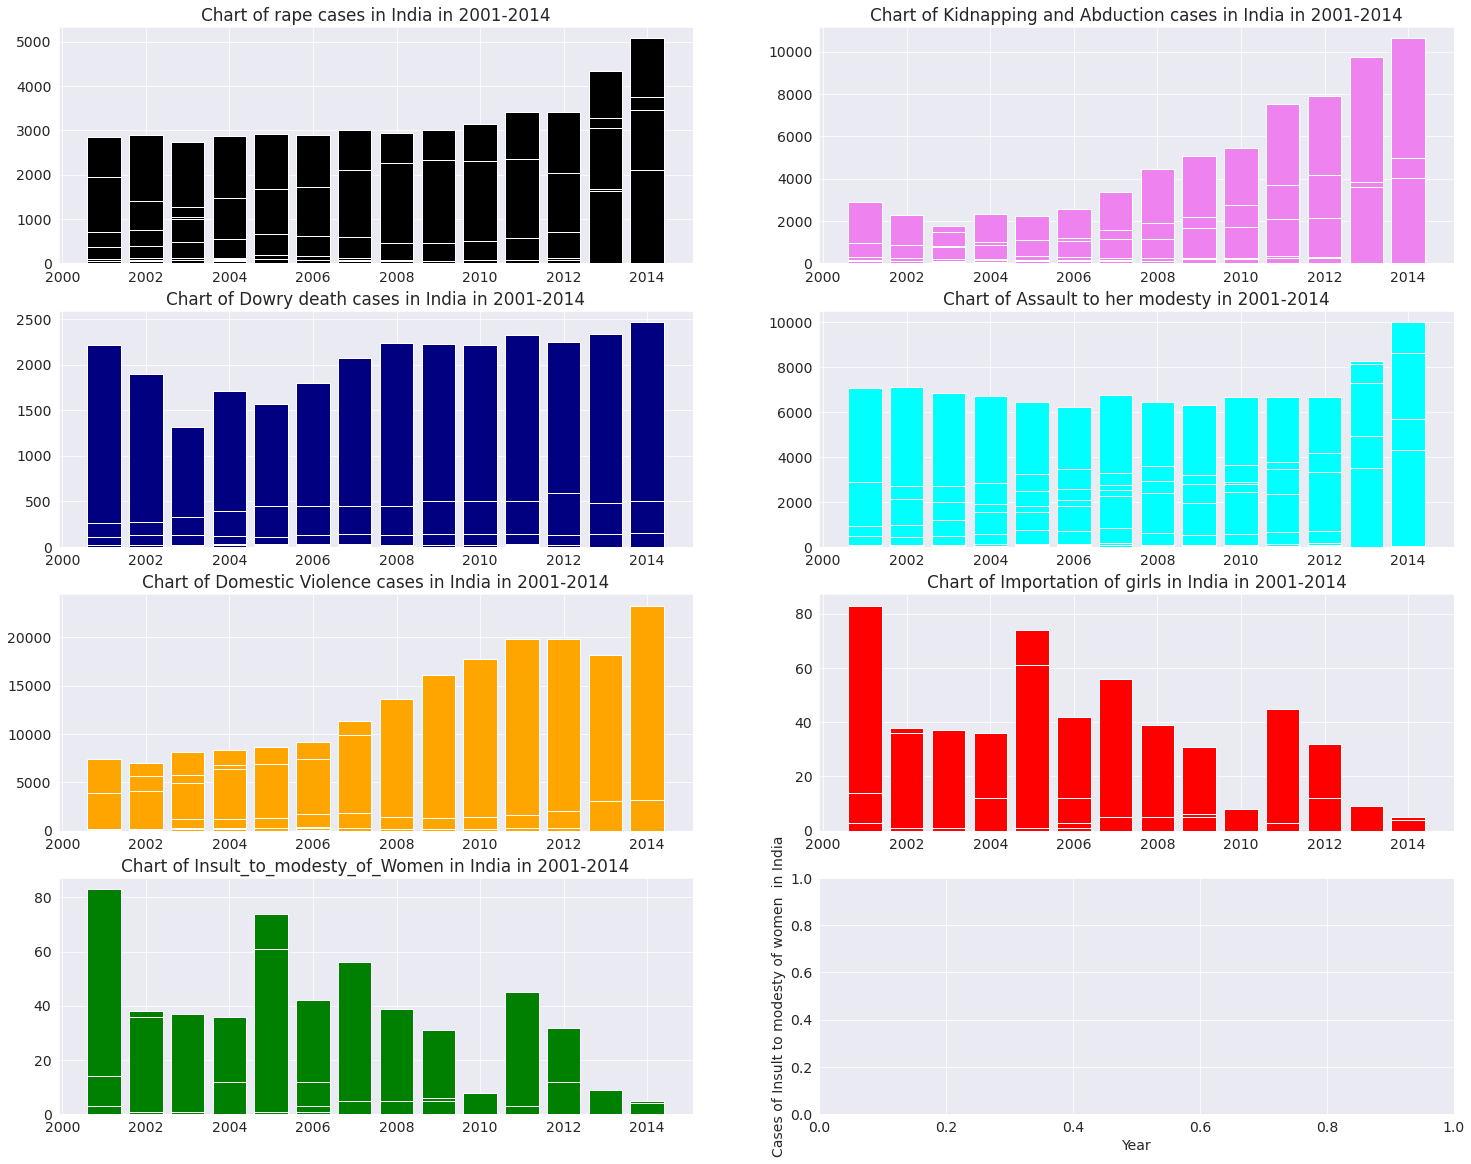

In [42]:
fig, axes = plt.subplots(4, 2, figsize=(25, 20))

axes[0,0].set_title("Chart of rape cases in India in 2001-2014")
axes[0,0].bar(dataset_df.Year, dataset_df.Rape, color = 'black');
plt.xlabel('Year') 
plt.ylabel('Cases of Rape in India') 


axes[0,1].set_title("Chart of Kidnapping and Abduction cases in India in 2001-2014")
axes[0,1].bar(dataset_df.Year, dataset_df.Kidnapping_Abduction, color = 'violet');
plt.xlabel('Year') 
plt.ylabel('Cases of Kidnapping and Abduction in India') 

axes[1,0].set_title("Chart of Dowry death cases in India in 2001-2014")
axes[1,0].bar(dataset_df.Year, dataset_df.Dowry_Deaths, color = 'navy');
plt.xlabel('Year') 
plt.ylabel('Cases of Dowry deaths in India') 

axes[1,1].set_title("Chart of Assault to her modesty in 2001-2014")
axes[1,1].bar(dataset_df.Year, dataset_df.Hurting_of_womens_modesty, color = 'cyan');
plt.xlabel('Year') 
plt.ylabel('Cases of Assaulting a women for her modesty in India') 

axes[2,0].set_title("Chart of Domestic Violence cases in India in 2001-2014")
axes[2,0].bar(dataset_df.Year, dataset_df.Domestic_Cruelty, color = 'orange');
plt.xlabel('Year') 
plt.ylabel('Cases of Domestic Violence in India') 

axes[2,1].set_title("Chart of Importation of girls in India in 2001-2014")
axes[2,1].bar(dataset_df.Year, dataset_df.Importation_of_Girls, color = 'red');
plt.xlabel('Year') 
plt.ylabel('Cases ofImportation of girls in India') 

axes[3,0].set_title("Chart of Insult_to_modesty_of_Women in India in 2001-2014")
axes[3,0].bar(dataset_df.Year, dataset_df.Importation_of_Girls, color = 'green');
plt.xlabel('Year') 
plt.ylabel('Cases of Insult to modesty of women  in India') 

It is very clear from the graph the cases have increased over the year. 

for ease of calculation we are dropping 3 coloumn

In [44]:
dataset_df.drop(['Insult_to_womens_modesty','Hurting_of_womens_modesty','Importation_of_Girls','Unnamed: 0'],axis=1)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty
0,andhra pradesh,ADILABAD,2001,50,30,16,175
1,andhra pradesh,ANANTAPUR,2001,23,30,7,154
2,andhra pradesh,CHITTOOR,2001,27,34,14,186
3,andhra pradesh,CUDDAPAH,2001,20,20,17,57
4,andhra pradesh,EAST GODAVARI,2001,23,26,12,247
...,...,...,...,...,...,...,...
10672,lakshadweep,Lakshadweep,2014,1,0,0,0
10673,lakshadweep,Total District(s),2014,1,0,0,0
10674,puducherry,Karaikal,2014,3,1,0,1
10675,puducherry,Puducherry,2014,7,6,1,3


Let us save and upload our work to Jovian before continuing

In [45]:
import jovian

In [46]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "renuverma55/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/renuverma55/zerotopandas-course-project-starter


'https://jovian.ai/renuverma55/zerotopandas-course-project-starter'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1:Create a dataset of crime details state wise


In [47]:
statewise_df = dataset_df.groupby('STATE/UT')[['Rape','Kidnapping_Abduction','Dowry_Deaths','Domestic_Cruelty']].sum()

In [48]:
statewise_df

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty
STATE/UT,,,,
a & n islands,336,212,20,288
andhra pradesh,32150,34504,13844,280906
arunachal pradesh,1316,1470,6,476
assam,40190,62074,3268,115300
bihar,30758,57086,32206,69770
chandigarh,770,1682,90,2080
chhattisgarh,29308,11808,2758,23436
d & n haveli,132,224,2,90
daman & diu,60,44,6,76


#### Q2: Which state has maximum number of rape cases in the span of 2001-2014

In [49]:
maxi_rape = statewise_df.sort_values(by ='Rape',ascending = False).head(10)

In [50]:
maxi_rape

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty
STATE/UT,,,,
madhya pradesh,90996,35608,21090,102816
uttar pradesh,51150,135906,57256,193738
maharashtra,48974,30368,9696,193202
west bengal,47876,61158,12308,344124
rajasthan,45684,66278,11854,262200
assam,40190,62074,3268,115300
andhra pradesh,32150,34504,13844,280906
bihar,30758,57086,32206,69770
odisha,30480,25588,10782,49206


Madhya Pradesh has topped in number of Rape Cases in the span of 2001 -2004

#### Q3: Which state has maximum number of Kidnapping cases in the span of 2001-2014

In [58]:


statewise_df.sort_values(by ='Kidnapping_Abduction',ascending = False).head(10)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty
STATE/UT,,,,
uttar pradesh,51150,135906,57256,193738
rajasthan,45684,66278,11854,262200
assam,40190,62074,3268,115300
west bengal,47876,61158,12308,344124
bihar,30758,57086,32206,69770
delhi,20312,46586,3758,42834
madhya pradesh,90996,35608,21090,102816
gujarat,11644,34670,1108,146468
andhra pradesh,32150,34504,13844,280906


In number of Kidnapping cases Uttar Pradesh has topped.

#### Q4: List the top 10 state which has maximum number of Dowry deaths

In [59]:
statewise_df.sort_values(by ='Dowry_Deaths',ascending = False).head(10)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty
STATE/UT,,,,
uttar pradesh,51150,135906,57256,193738
bihar,30758,57086,32206,69770
madhya pradesh,90996,35608,21090,102816
andhra pradesh,32150,34504,13844,280906
west bengal,47876,61158,12308,344124
rajasthan,45684,66278,11854,262200
odisha,30480,25588,10782,49206
maharashtra,48974,30368,9696,193202
jharkhand,22826,14186,7896,23910


Uttar Pradesh has maximum cases of Dowry Deaths.

#### Q5: Which state has maximum number of Domestic Cruelty

In [60]:
statewise_df.sort_values(by ='Domestic_Cruelty',ascending = False).head(10)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty
STATE/UT,,,,
west bengal,47876,61158,12308,344124
andhra pradesh,32150,34504,13844,280906
rajasthan,45684,66278,11854,262200
uttar pradesh,51150,135906,57256,193738
maharashtra,48974,30368,9696,193202
gujarat,11644,34670,1108,146468
assam,40190,62074,3268,115300
kerala,20030,4452,700,111626
madhya pradesh,90996,35608,21090,102816


West bengal has resister maximum number of domestic cruelty cases.

#### Q4: TODO - ask a question here and answer it below

In [61]:
import jovian

In [62]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "renuverma55/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/renuverma55/zerotopandas-course-project-starter


'https://jovian.ai/renuverma55/zerotopandas-course-project-starter'

## Inferences and Conclusion

1.Total number of reported crime cases is more than 5 million in the span of 2001-2014. This is very depressing  figure.

2. Madhaya pradesh has topped in the number of Rape cases.

3. Uttar pradesh has highest number of Kidnapping as well as highest number of dowry Cases.

4. on Surprise West Bengal has maximum number of  reported domestic cruelty cases in indiz

In [35]:
import jovian

In [67]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "renuverma55/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/renuverma55/zerotopandas-course-project-starter


'https://jovian.ai/renuverma55/zerotopandas-course-project-starter'

## References and Future Work

https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas.

In [65]:
import jovian